# 1. Input data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import math

In [7]:
os.chdir('I:/10_STAFF/YP/HTS/Glendale analysis')
df=pd.read_csv('result_all_HTSs_from_v8_beta6_with_TAZ.csv')
df_trip=pd.read_excel('I:/10_STAFF/YP/HTS/trip.xlsx')
df_Person=pd.read_csv('I:/10_STAFF/YP/HTS/Person.csv',encoding='latin-1')
df_TAZ= pd.read_csv('I:/10_STAFF/YP/HTS/TAZ.csv') 
#mode_lookup = pd.read_excel('I:/10_STAFF/YP/HTS/lookup.xlsx', sheet_name='Mode_lookup') 
#Activity_lookup = pd.read_excel('I:/10_STAFF/YP/HTS/lookup.xlsx', sheet_name='Activity_lookup') 
#Age_lookup = pd.read_excel('I:/10_STAFF/YP/HTS/lookup.xlsx', sheet_name='Age_lookup') 

In [8]:
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 


df_trip['distance']=distance(df_trip['O_lat'], df_trip['O_lon'], df_trip['D_lat'], df_trip['D_lon'])

trip= df_trip[['HHPERSONID' ,'O_StopID','D_StopID','Trip_StartTime','Trip_EndTime','distance']]
trip.head()

,HHPERSONID,O_StopID,D_StopID,Trip_StartTime,Trip_EndTime,distance
0,300002341,3.000023e+10,30000234102,2016-04-18 06:16:12,2016-04-18 06:28:12,8.595636
1,300002341,3.000023e+10,30000234103,2016-04-18 06:33:56,2016-04-18 06:58:10,14.461508
2,300002341,3.000023e+10,30000234104,2016-04-18 12:40:38,2016-04-18 12:44:49,2.439222
3,300002341,3.000023e+10,30000234105,2016-04-18 12:50:52,2016-04-18 13:47:45,2.424041
4,300002341,3.000023e+10,30000234106,2016-04-18 17:01:53,2016-04-18 17:33:16,22.948138


In [9]:
trip.head()

,HHPERSONID,O_StopID,D_StopID,Trip_StartTime,Trip_EndTime,distance
0,300002341,3.000023e+10,30000234102,2016-04-18 06:16:12,2016-04-18 06:28:12,8.595636
1,300002341,3.000023e+10,30000234103,2016-04-18 06:33:56,2016-04-18 06:58:10,14.461508
2,300002341,3.000023e+10,30000234104,2016-04-18 12:40:38,2016-04-18 12:44:49,2.439222
3,300002341,3.000023e+10,30000234105,2016-04-18 12:50:52,2016-04-18 13:47:45,2.424041
4,300002341,3.000023e+10,30000234106,2016-04-18 17:01:53,2016-04-18 17:33:16,22.948138


In [10]:
mode_lookup = pd.read_excel('I:/10_STAFF/YP/HTS/lookup.xlsx', sheet_name='Mode_lookup') 
Activity_lookup = pd.read_excel('I:/10_STAFF/YP/HTS/lookup.xlsx', sheet_name='Activity_lookup') 
#Age_lookup = pd.read_excel('I:/10_STAFF/YP/HTS/lookup.xlsx', sheet_name='Age_lookup') 


In [11]:
age=df_Person[['HHPERSONID','WRKR']]

age['Employ_status'] = 'Other'
age.loc[age['WRKR']<=3, 'Employ_status'] = 'Employee'
age.loc[age['WRKR']==8, 'Employ_status'] = 'Student'

age=age[['HHPERSONID','Employ_status']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
df=df[(df['OStopID']!= -1) | (df['DStopID']!= -1) ]
df['Timestamp']=pd.to_datetime(df['Timestamp'])   
df['leavenode']=pd.to_datetime(df['leavenode'])   
TAZ=df_TAZ[['TAZ','MPA_NAME']].rename(columns = {'MPA_CODE':'CITY'})
t_weight=df_trip[['HHPERSONID','Weight']]
t_weight.drop_duplicates(subset=['HHPERSONID','Weight'], keep='first',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 2. Data process

In [139]:
df.dtypes

Timestamp        datetime64[ns]
leavenode        datetime64[ns]
node                      int64
link                    float64
direction                 int64
y                       float64
x                       float64
milepost                float64
trip_milepost           float64
milepost3               float64
is_per_veh                int64
mode_id                 float64
purpose                   int64
time_epoch                int64
OStopID                   int64
DStopID                   int64
HHPERSONID                int64
OTAZ                      int64
DTAZ                      int64
dtype: object

In [140]:
trip.dtypes

HHPERSONID                 int64
O_StopID                 float64
D_StopID                   int64
Trip_StartTime    datetime64[ns]
Trip_EndTime      datetime64[ns]
distance                 float64
dtype: object

In [200]:
df1 = df.groupby(['HHPERSONID','OStopID','DStopID','OTAZ','DTAZ','mode_id','purpose'])\
   .aggregate({'milepost3':sum,'leavenode':min ,'Timestamp':max})\
   .reset_index()

df1['time']=(pd.to_datetime(df1['Timestamp'])-pd.to_datetime(df1['leavenode'])).dt.total_seconds()/60

In [201]:
trip_length=df1.merge(TAZ,left_on='OTAZ',right_on='TAZ',how='left')
my_columns = ['HHPERSONID','OStopID','DStopID','OTAZ','DTAZ','mode_id','purpose','mile', 'Start','Arrive', 'time','TAZ','Ocity']
trip_length.columns = my_columns
trip_length=trip_length.merge(TAZ,left_on='DTAZ',right_on='TAZ',how='left').rename(columns={'MPA_NAME':'Dcity'}).drop(columns=['TAZ_x','TAZ_y'])
trip_length= trip_length.merge(t_weight)
trip_length=trip_length.merge(mode_lookup)
trip_length=trip_length.merge(Activity_lookup,left_on='purpose',right_on='Activity_id',how='left')\
            .drop(columns=['Activity_id','Activity_plot'])\
            .rename(columns={'Activity_type':'trip_purpose'})
trip_length=trip_length.merge(age)
trip_length.sort_values(["HHPERSONID","OStopID","DStopID"],inplace=True)

In [202]:
trip_length1=trip_length

check problematic data

In [203]:
trip_length1[((trip_length1['mile']*60/trip_length['time'])<5) & (trip_length1['DStopID']-trip_length1['OStopID']==2)]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,time,Ocity,Dcity,Weight,mode,trip_purpose,Employ_status
85,300012421,30001242106,30001242108,664,610,8,1,5.287220,2016-04-06 12:01:00,2016-04-06 17:10:26,309.433333,Phoenix,Phoenix,860.936910,Default,Primary Home,Student
110,300014572,30001457201,30001457203,1032,1029,3,14,2.623073,2016-04-21 10:03:00,2016-04-21 15:45:00,342.000000,Paradise Valley,Paradise Valley,1118.702712,Vehicle,Other,Other
311,300035812,30003581204,30003581206,1179,1561,3,2,23.832345,2016-04-12 08:42:00,2016-04-12 20:53:00,731.000000,Tempe,Gilbert,106.572456,Vehicle,Work,Employee
49100,300042254,30004225404,30004225406,1331,1328,8,6,1.354742,2016-04-11 14:30:00,2016-04-11 19:17:57,287.950000,Mesa,Mesa,372.756264,Default,Personal Errands/Tasks,Employee
394,300044532,30004453202,30004453204,1209,1402,8,1,11.264761,2016-04-06 07:47:00,2016-04-06 15:43:53,476.883333,Tempe,Mesa,1232.435645,Default,Primary Home,Employee
595,300070342,30007034208,30007034210,1344,1342,3,8,0.723901,2016-04-11 19:11:00,2016-04-11 20:04:00,53.000000,Mesa,Mesa,152.920694,Vehicle,Change Travel Mode/Transfer,Employee
668,300075422,30007542201,30007542203,629,3045,3,5,4.413452,2016-04-11 08:10:00,2016-04-11 11:33:00,203.000000,Phoenix,Phoenix,212.079220,Vehicle,Shopping,Employee
702,300078942,30007894203,30007894205,606,606,4,43,0.108074,2016-04-07 07:56:00,2016-04-07 08:03:00,7.000000,Phoenix,Phoenix,547.597846,Foot,School,Student
796,300091785,30009178502,30009178504,665,3017,3,1,3.493981,2016-04-04 07:13:00,2016-04-04 16:15:00,542.000000,Phoenix,Glendale,304.973914,Vehicle,Primary Home,Student
799,300091786,30009178603,30009178605,774,3044,3,8,2.091833,2016-04-04 13:11:00,2016-04-04 15:03:00,112.000000,Phoenix,Phoenix,304.973914,Vehicle,Change Travel Mode/Transfer,Student


In [204]:
trip_length1[trip_length1['time']<0]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,time,Ocity,Dcity,Weight,mode,trip_purpose,Employ_status
1156,300145991,30014599114,30014599115,1205,1205,8,8,0.067659,2016-04-19 22:07:00,2016-04-19 20:01:00,-126.0,Tempe,Tempe,220.516316,Default,Change Travel Mode/Transfer,Employee
2098,300257971,30025797103,30025797104,2998,2998,3,2,0.048471,2016-05-03 20:26:00,2016-05-03 20:05:00,-21.0,Phoenix,Phoenix,432.352129,Vehicle,Work,Employee
2701,300331451,30033145105,30033145106,1231,1231,8,1,0.031955,2016-05-05 18:30:00,2016-05-05 16:47:00,-103.0,Chandler,Chandler,74.080861,Default,Primary Home,Employee
2912,300366411,30036641107,30036641109,1841,1841,10,11,0.169842,2016-04-25 19:52:00,2016-04-25 17:58:00,-114.0,Scottsdale,Scottsdale,317.959363,Air,Social/Recreational/Entertainment,Employee
49327,300385221,30038522107,30038522108,680,680,8,12,0.106231,2016-04-26 18:02:00,2016-04-26 18:01:00,-1.0,Phoenix,Phoenix,270.186968,Default,Exercise/Play Sports,Employee
49380,300551251,30055125104,30055125105,520,520,8,1,0.065566,2016-05-12 14:23:00,2016-05-12 14:15:00,-8.0,Phoenix,Phoenix,535.101895,Default,Primary Home,Other
49447,300822324,30082232401,30082232402,243,243,8,11,0.000000,2016-05-26 13:21:00,2016-05-26 09:56:00,-205.0,El Mirage,El Mirage,199.210790,Default,Social/Recreational/Entertainment,Employee
6542,300828883,30082888307,30082888308,2582,2582,8,1,0.051987,2016-05-20 14:16:00,2016-05-20 14:13:00,-3.0,Casa Grande,Casa Grande,2802.442221,Default,Primary Home,Other
6761,300860351,30086035113,30086035114,2852,2852,3,1,0.052376,2016-05-19 16:26:00,2016-05-19 14:18:00,-128.0,Queen Creek,Queen Creek,229.485452,Vehicle,Primary Home,Other
49472,300915592,30091559201,30091559202,237,237,8,11,0.000000,2016-05-26 08:27:00,2016-05-25 17:00:00,-927.0,Goodyear,Goodyear,148.182343,Default,Social/Recreational/Entertainment,Other


### reassign time for some problematic data

In [205]:
 trip_length=pd.merge(trip_length, trip,  how='left', left_on=['HHPERSONID','DStopID'], right_on = ['HHPERSONID','D_StopID'])

In [206]:
 trip_length=pd.merge(trip_length, trip,  how='left', left_on=['HHPERSONID','OStopID'], right_on = ['HHPERSONID','O_StopID'])

In [207]:
#trip_length[trip_length['DStopID']-trip_length['OStopID']>1]

In [208]:
trip_length['Arrive']=np.where((trip_length['time']<0) & (trip_length['DStopID']-trip_length['OStopID']==1),trip_length['Trip_EndTime_x'],trip_length['Arrive'])

In [211]:
trip_length[trip_length['HHPERSONID']==300002341]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,...,O_StopID_x,D_StopID_x,Trip_StartTime_x,Trip_EndTime_x,distance_x,O_StopID_y,D_StopID_y,Trip_StartTime_y,Trip_EndTime_y,distance_y
0,300002341,30000234101,30000234102,216,279,3,10,6.073559,2016-04-18 06:16:00,2016-04-18 06:28:00,...,3.000023e+10,30000234102,2016-04-18 06:16:12,2016-04-18 06:28:12,8.595636,3.000023e+10,30000234102,2016-04-18 06:16:12,2016-04-18 06:28:12,8.595636
1,300002341,30000234102,30000234103,279,748,3,2,10.072565,2016-04-18 06:33:00,2016-04-18 06:58:00,...,3.000023e+10,30000234103,2016-04-18 06:33:56,2016-04-18 06:58:10,14.461508,3.000023e+10,30000234103,2016-04-18 06:33:56,2016-04-18 06:58:10,14.461508
2,300002341,30000234103,30000234104,748,744,3,6,2.388653,2016-04-18 12:40:00,2016-04-18 12:44:00,...,3.000023e+10,30000234104,2016-04-18 12:40:38,2016-04-18 12:44:49,2.439222,3.000023e+10,30000234104,2016-04-18 12:40:38,2016-04-18 12:44:49,2.439222
3,300002341,30000234104,30000234105,744,748,3,2,2.250296,2016-04-18 12:50:00,2016-04-18 13:47:00,...,3.000023e+10,30000234105,2016-04-18 12:50:52,2016-04-18 13:47:45,2.424041,3.000023e+10,30000234105,2016-04-18 12:50:52,2016-04-18 13:47:45,2.424041
4,300002341,30000234105,30000234106,748,216,3,1,16.165844,2016-04-18 17:01:00,2016-04-18 17:32:52,...,3.000023e+10,30000234106,2016-04-18 17:01:53,2016-04-18 17:33:16,22.948138,3.000023e+10,30000234106,2016-04-18 17:01:53,2016-04-18 17:33:16,22.948138


In [210]:
trip_length['Start']=np.where(((trip_length['mile']*60/trip_length['time'])<5)&( trip_length['mode']!='Foot') & (trip_length['DStopID']-trip_length['OStopID']==2)& (trip_length['distance_y']<1) & (trip_length['distance_x'] >trip_length['distance_y']),trip_length['Trip_StartTime_x'],trip_length['Start'])

In [212]:
trip_length['time']=(pd.to_datetime(trip_length['Arrive'])-pd.to_datetime(trip_length['Start'])).dt.total_seconds()/60

In [213]:
trip_length[(trip_length['time']<0)]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,...,O_StopID_x,D_StopID_x,Trip_StartTime_x,Trip_EndTime_x,distance_x,O_StopID_y,D_StopID_y,Trip_StartTime_y,Trip_EndTime_y,distance_y
3189,300366411,30036641107,30036641109,1841,1841,10,11,0.169842,2016-04-25 20:14:48,2016-04-25 17:58:00,...,3.003664e+10,30036641109,2016-04-25 20:14:48,2016-04-25 20:15:03,0.036414,3.003664e+10,30036641108,2016-04-25 19:52:48,2016-04-25 19:54:48,0.019983


In [214]:
trip_length[((trip_length['mile']*60/trip_length['time'])<5) & (trip_length['DStopID']-trip_length['OStopID']==2)]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,...,O_StopID_x,D_StopID_x,Trip_StartTime_x,Trip_EndTime_x,distance_x,O_StopID_y,D_StopID_y,Trip_StartTime_y,Trip_EndTime_y,distance_y
87,300012421,30001242106,30001242108,664,610,8,1,5.287220,2016-04-06 14:12:50,2016-04-06 17:10:26,...,3.000124e+10,30001242108,2016-04-06 14:12:50,2016-04-06 17:12:44,7.469270,3.000124e+10,30001242107,2016-04-06 12:01:50,2016-04-06 12:14:20,0.064454
367,300042254,30004225404,30004225406,1331,1328,8,6,1.354742,2016-04-11 19:01:01,2016-04-11 19:17:57,...,3.000423e+10,30004225406,2016-04-11 19:01:01,2016-04-11 19:18:31,1.498520,3.000423e+10,30004225405,2016-04-11 14:30:46,2016-04-11 14:31:01,0.008898
723,300078942,30007894203,30007894205,606,606,4,43,0.108074,2016-04-07 07:56:00,2016-04-07 08:03:00,...,3.000789e+10,30007894205,2016-04-07 08:03:26,2016-04-07 08:03:41,0.126769,3.000789e+10,30007894204,2016-04-07 07:56:41,2016-04-07 07:57:11,0.033064
987,300112091,30011209102,30011209104,909,909,3,12,0.446410,2016-04-04 14:34:27,2016-04-04 14:41:00,...,3.001121e+10,30011209104,2016-04-04 14:34:27,2016-04-04 14:41:06,0.128394,3.001121e+10,30011209103,2016-04-04 11:06:50,2016-04-04 11:17:22,0.009432
1234,300144101,30014410106,30014410108,1825,754,4,1,0.854980,2016-04-13 06:30:00,2016-04-13 06:48:00,...,3.001441e+10,30014410108,2016-04-13 06:33:59,2016-04-13 06:48:59,1.027700,3.001441e+10,30014410107,2016-04-13 06:30:44,2016-04-13 06:30:59,0.012411
1619,300182812,30018281201,30018281203,143,1168,4,8,17.887655,2016-04-11 07:55:00,2016-04-11 16:24:00,...,3.001828e+10,30018281203,2016-04-11 15:54:48,2016-04-11 16:24:45,25.282124,3.001828e+10,30018281202,2016-04-11 07:55:34,2016-04-11 12:24:41,0.000000
2072,300231202,30023120205,30023120207,682,682,4,12,0.334441,2016-04-12 15:24:00,2016-04-12 18:21:00,...,3.002312e+10,30023120207,2016-04-12 18:21:20,2016-04-12 18:21:20,0.272429,3.002312e+10,30023120206,2016-04-12 15:24:20,2016-04-12 15:24:35,0.008878
2147,300239551,30023955102,30023955104,709,789,4,1,4.458017,2016-04-27 07:08:00,2016-04-27 18:17:58,...,3.002396e+10,30023955104,2016-04-27 18:07:07,2016-04-27 18:18:22,5.121793,3.002396e+10,30023955103,2016-04-27 07:08:22,2016-04-27 07:10:07,0.087069
2385,300269741,30026974102,30026974104,865,867,4,5,0.656840,2016-05-03 03:46:00,2016-05-03 05:30:00,...,3.002697e+10,30026974104,2016-05-03 05:03:38,2016-05-03 05:30:38,0.591438,3.002697e+10,30026974103,2016-05-03 03:46:53,2016-05-03 03:52:38,0.052222
2735,300302391,30030239101,30030239103,1358,1358,4,12,0.738665,2016-04-25 07:20:00,2016-04-25 07:57:00,...,3.003024e+10,30030239103,2016-04-25 07:41:07,2016-04-25 07:57:32,0.726458,3.003024e+10,30030239102,2016-04-25 07:20:10,2016-04-25 07:32:01,0.004600


In [215]:
trip_length[(trip_length['time']>100)]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,...,O_StopID_x,D_StopID_x,Trip_StartTime_x,Trip_EndTime_x,distance_x,O_StopID_y,D_StopID_y,Trip_StartTime_y,Trip_EndTime_y,distance_y
15,300002344,30000234405,30000234406,771,216,3,1,18.860785,2016-04-18 15:37:00,2016-04-18 17:38:00,...,3.000023e+10,30000234406,2016-04-18 15:37:36,2016-04-18 17:38:42,27.355544,3.000023e+10,30000234406,2016-04-18 15:37:36,2016-04-18 17:38:42,27.355544
23,300002346,30000234601,30000234602,216,771,3,2,29.710862,2016-04-18 07:51:00,2016-04-18 09:33:00,...,3.000023e+10,30000234602,2016-04-18 07:51:55,2016-04-18 09:33:39,27.286727,3.000023e+10,30000234602,2016-04-18 07:51:55,2016-04-18 09:33:39,27.286727
87,300012421,30001242106,30001242108,664,610,8,1,5.287220,2016-04-06 14:12:50,2016-04-06 17:10:26,...,3.000124e+10,30001242108,2016-04-06 14:12:50,2016-04-06 17:12:44,7.469270,3.000124e+10,30001242107,2016-04-06 12:01:50,2016-04-06 12:14:20,0.064454
130,300016331,30001633102,30001633103,593,608,2,2,4.765224,2016-03-25 05:58:00,2016-03-25 08:04:00,...,3.000163e+10,30001633103,2016-03-25 05:58:48,2016-03-25 08:04:54,4.570807,3.000163e+10,30001633103,2016-03-25 05:58:48,2016-03-25 08:04:54,4.570807
189,300017602,30001760204,30001760207,923,923,6,2,0.632321,2016-04-06 07:54:00,2016-04-06 15:40:00,...,3.000176e+10,30001760207,2016-04-06 15:31:13,2016-04-06 15:40:17,0.576039,3.000176e+10,30001760205,2016-04-06 07:54:15,2016-04-06 07:59:17,0.107217
227,300025421,30002542105,30002542106,862,837,3,1,6.627983,2016-04-06 15:09:00,2016-04-06 19:25:58,...,3.000254e+10,30002542106,2016-04-06 15:09:44,2016-04-06 19:26:31,8.280963,3.000254e+10,30002542106,2016-04-06 15:09:44,2016-04-06 19:26:31,8.280963
233,300029822,30002982206,30002982207,0,933,3,2,77.853618,2016-04-05 19:11:00,2016-04-05 20:53:00,...,3.000298e+10,30002982207,2016-04-05 19:11:02,2016-04-05 20:53:24,1000.222376,3.000298e+10,30002982207,2016-04-05 19:11:02,2016-04-05 20:53:24,1000.222376
236,300029823,30002982302,30002982303,2912,1920,3,12,4.472498,2016-04-05 14:43:00,2016-04-05 17:52:00,...,3.000298e+10,30002982303,2016-04-05 14:43:00,2016-04-05 17:52:18,4.428237,3.000298e+10,30002982303,2016-04-05 14:43:00,2016-04-05 17:52:18,4.428237
309,300035812,30003581201,30003581202,1927,1412,3,8,14.545665,2016-04-12 04:43:00,2016-04-12 07:56:00,...,3.000358e+10,30003581202,2016-04-12 04:43:51,2016-04-12 07:56:59,11.953328,3.000358e+10,30003581202,2016-04-12 04:43:51,2016-04-12 07:56:59,11.953328
312,300035812,30003581204,30003581206,1179,1561,3,2,23.832345,2016-04-12 18:57:04,2016-04-12 20:53:00,...,3.000358e+10,30003581206,2016-04-12 18:57:04,2016-04-12 20:53:14,22.552020,3.000358e+10,30003581205,2016-04-12 08:42:03,2016-04-12 08:42:44,0.053015


In [216]:
trip_length[trip_length['HHPERSONID']==300002341]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,...,O_StopID_x,D_StopID_x,Trip_StartTime_x,Trip_EndTime_x,distance_x,O_StopID_y,D_StopID_y,Trip_StartTime_y,Trip_EndTime_y,distance_y
0,300002341,30000234101,30000234102,216,279,3,10,6.073559,2016-04-18 06:16:00,2016-04-18 06:28:00,...,3.000023e+10,30000234102,2016-04-18 06:16:12,2016-04-18 06:28:12,8.595636,3.000023e+10,30000234102,2016-04-18 06:16:12,2016-04-18 06:28:12,8.595636
1,300002341,30000234102,30000234103,279,748,3,2,10.072565,2016-04-18 06:33:00,2016-04-18 06:58:00,...,3.000023e+10,30000234103,2016-04-18 06:33:56,2016-04-18 06:58:10,14.461508,3.000023e+10,30000234103,2016-04-18 06:33:56,2016-04-18 06:58:10,14.461508
2,300002341,30000234103,30000234104,748,744,3,6,2.388653,2016-04-18 12:40:00,2016-04-18 12:44:00,...,3.000023e+10,30000234104,2016-04-18 12:40:38,2016-04-18 12:44:49,2.439222,3.000023e+10,30000234104,2016-04-18 12:40:38,2016-04-18 12:44:49,2.439222
3,300002341,30000234104,30000234105,744,748,3,2,2.250296,2016-04-18 12:50:00,2016-04-18 13:47:00,...,3.000023e+10,30000234105,2016-04-18 12:50:52,2016-04-18 13:47:45,2.424041,3.000023e+10,30000234105,2016-04-18 12:50:52,2016-04-18 13:47:45,2.424041
4,300002341,30000234105,30000234106,748,216,3,1,16.165844,2016-04-18 17:01:00,2016-04-18 17:32:52,...,3.000023e+10,30000234106,2016-04-18 17:01:53,2016-04-18 17:33:16,22.948138,3.000023e+10,30000234106,2016-04-18 17:01:53,2016-04-18 17:33:16,22.948138


In [217]:
trip_length['Arrive']=np.where((trip_length['time']<0) & (trip_length['DStopID']-trip_length['OStopID']==2),trip_length['Trip_EndTime_x'],trip_length['Arrive'])

In [218]:
trip_length['time']=(pd.to_datetime(trip_length['Arrive'])-pd.to_datetime(trip_length['Start'])).dt.total_seconds()/60

In [219]:
trip_length=trip_length.drop(columns=['O_StopID_x','D_StopID_x','Trip_StartTime_x','Trip_EndTime_x','distance_x','D_StopID_y','Trip_StartTime_y','O_StopID_y','Trip_EndTime_y','distance_y'])

Check problematic data again

In [220]:
trip_length[(trip_length['time']<0)]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,time,Ocity,Dcity,Weight,mode,trip_purpose,Employ_status


In [221]:
#trip_length1[trip_length1['HHPERSONID']==5001091703]

In [222]:
trip_length[(trip_length['time']>100)]

,HHPERSONID,OStopID,DStopID,OTAZ,DTAZ,mode_id,purpose,mile,Start,Arrive,time,Ocity,Dcity,Weight,mode,trip_purpose,Employ_status
15,300002344,30000234405,30000234406,771,216,3,1,18.860785,2016-04-18 15:37:00,2016-04-18 17:38:00,121.000000,Phoenix,Goodyear,52.374018,Vehicle,Primary Home,Employee
23,300002346,30000234601,30000234602,216,771,3,2,29.710862,2016-04-18 07:51:00,2016-04-18 09:33:00,102.000000,Goodyear,Phoenix,52.374018,Vehicle,Work,Employee
87,300012421,30001242106,30001242108,664,610,8,1,5.287220,2016-04-06 14:12:50,2016-04-06 17:10:26,177.600000,Phoenix,Phoenix,860.936910,Default,Primary Home,Student
130,300016331,30001633102,30001633103,593,608,2,2,4.765224,2016-03-25 05:58:00,2016-03-25 08:04:00,126.000000,Phoenix,Phoenix,263.272726,Bus,Work,Employee
189,300017602,30001760204,30001760207,923,923,6,2,0.632321,2016-04-06 07:54:00,2016-04-06 15:40:00,466.000000,Phoenix,Phoenix,350.949151,Light Rail,Work,Employee
227,300025421,30002542105,30002542106,862,837,3,1,6.627983,2016-04-06 15:09:00,2016-04-06 19:25:58,256.966667,Phoenix,Phoenix,236.525343,Vehicle,Primary Home,Employee
233,300029822,30002982206,30002982207,0,933,3,2,77.853618,2016-04-05 19:11:00,2016-04-05 20:53:00,102.000000,NaN,Phoenix,60.723562,Vehicle,Work,Employee
236,300029823,30002982302,30002982303,2912,1920,3,12,4.472498,2016-04-05 14:43:00,2016-04-05 17:52:00,189.000000,Phoenix,Tempe,60.723562,Vehicle,Exercise/Play Sports,Employee
309,300035812,30003581201,30003581202,1927,1412,3,8,14.545665,2016-04-12 04:43:00,2016-04-12 07:56:00,193.000000,Mesa,Mesa,106.572456,Vehicle,Change Travel Mode/Transfer,Employee
312,300035812,30003581204,30003581206,1179,1561,3,2,23.832345,2016-04-12 18:57:04,2016-04-12 20:53:00,115.933333,Tempe,Gilbert,106.572456,Vehicle,Work,Employee


In [223]:
#trip_length[((trip_length['mile']*60/trip_length['time'])<5) & (trip_length['DStopID']-trip_length['OStopID']==2)]

In [224]:
trip_length['mile_group'] = '>50'
trip_length.loc[trip_length['mile']<=50, 'mile_group'] = '41-50'
trip_length.loc[trip_length['mile']<=40, 'mile_group'] = '36-40'
trip_length.loc[trip_length['mile']<=35, 'mile_group'] = '31-35'
trip_length.loc[trip_length['mile']<=30, 'mile_group'] = '26-30'
trip_length.loc[trip_length['mile']<=25, 'mile_group'] = '21-25'
trip_length.loc[trip_length['mile']<=20, 'mile_group'] = '16-20'
trip_length.loc[trip_length['mile']<=15, 'mile_group'] = '11-15'
trip_length.loc[trip_length['mile']<=10, 'mile_group'] = '6-10'
trip_length.loc[trip_length['mile']<=5, 'mile_group'] = '<=5'

trip_length['mile_sort'] = 10
trip_length.loc[trip_length['mile']<=50, 'mile_sort'] = 9
trip_length.loc[trip_length['mile']<=40, 'mile_sort'] = 8
trip_length.loc[trip_length['mile']<=35, 'mile_sort'] = 7
trip_length.loc[trip_length['mile']<=30, 'mile_sort'] = 6
trip_length.loc[trip_length['mile']<=25, 'mile_sort'] = 5
trip_length.loc[trip_length['mile']<=20, 'mile_sort'] = 4
trip_length.loc[trip_length['mile']<=15, 'mile_sort'] = 3
trip_length.loc[trip_length['mile']<=10, 'mile_sort'] = 2
trip_length.loc[trip_length['mile']<=5, 'mile_sort'] = 1


In [264]:
trip_length['time_group'] = '>70'
trip_length.loc[trip_length['time']<=70, 'time_group'] = '66-70'
trip_length.loc[trip_length['time']<=65, 'time_group'] = '61-65'
trip_length.loc[trip_length['time']<=60, 'time_group'] = '56-60'
trip_length.loc[trip_length['time']<=55, 'time_group'] = '51-55'
trip_length.loc[trip_length['time']<=50, 'time_group'] = '46-50'
trip_length.loc[trip_length['time']<=45, 'time_group'] = '41-45'
trip_length.loc[trip_length['time']<=40, 'time_group'] = '36-40'
trip_length.loc[trip_length['time']<=35, 'time_group'] = '31-35'
trip_length.loc[trip_length['time']<=30, 'time_group'] = '26-30'
trip_length.loc[trip_length['time']<=25, 'time_group'] = '21-25'
trip_length.loc[trip_length['time']<=20, 'time_group'] = '16-20'
trip_length.loc[trip_length['time']<=15, 'time_group'] = '11-15'
trip_length.loc[trip_length['time']<=10, 'time_group'] = '6-10'
trip_length.loc[trip_length['time']<=5, 'time_group'] = '<=5'

trip_length['time_sort'] = 15
trip_length.loc[trip_length['time']<=70, 'time_sort'] = 14
trip_length.loc[trip_length['time']<=65, 'time_sort'] = 13
trip_length.loc[trip_length['time']<=60, 'time_sort'] = 12
trip_length.loc[trip_length['time']<=55, 'time_sort'] = 11
trip_length.loc[trip_length['time']<=50, 'time_sort'] = 10
trip_length.loc[trip_length['time']<=45, 'time_sort'] = 9
trip_length.loc[trip_length['time']<=40, 'time_sort'] = 8
trip_length.loc[trip_length['time']<=35, 'time_sort'] = 7
trip_length.loc[trip_length['time']<=30, 'time_sort'] = 6
trip_length.loc[trip_length['time']<=25, 'time_sort'] = 5
trip_length.loc[trip_length['time']<=20, 'time_sort'] = 4
trip_length.loc[trip_length['time']<=15, 'time_sort'] = 3
trip_length.loc[trip_length['time']<=10, 'time_sort'] = 2
trip_length.loc[trip_length['time']<=5, 'time_sort'] = 1

In [226]:
trip_length.to_csv('trip_length.csv')
trip_length1.to_csv('trip_length_old.csv')

# Result

### Average trip length in MAG region

Unweighted trip  time

In [227]:
trip_length1['time'].mean()

21.566029688818254

In [228]:
trip_length['time'].mean()

20.824802832454964

In [249]:
trip_length['mile'].mean()

6.5682714405963685

Weighted trip time

In [229]:
sum(trip_length['time']*trip_length['Weight'])/sum(trip_length['Weight'])

20.9633301188327

In [250]:
sum(trip_length['mile']*trip_length['Weight'])/sum(trip_length['Weight'])

6.890765272840732

from trip table

In [230]:
df_trip=df_trip[df_trip['Trip_Duration_sec']>0]

In [134]:
df_trip['Trip_Duration_sec'].mean()/60

20.713977584325

In [135]:
sum(df_trip['Trip_Duration_sec']*df_trip['Weight'])/sum(df_trip['Weight'])/60

20.78528561432696

Text(0.5,0,'time(min)')

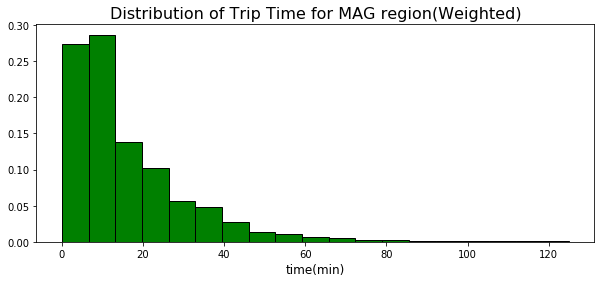

In [231]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length['time'], weights=trip_length['Weight']/sum(trip_length['Weight']), bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for MAG region(Weighted)", fontsize=16)
plt.xlabel('time(min)',fontsize=12 )

Text(0.5,0,'time(min)')

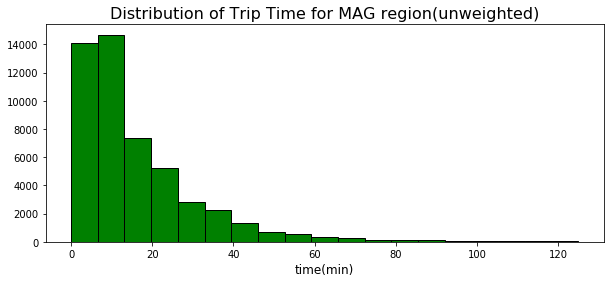

In [247]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length['time'],bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for MAG region(unweighted)", fontsize=16)
plt.xlabel('time(min)',fontsize=12 )

In [233]:
#trip_length['time'].hist(bins=bin ,color='g', figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000321BAF98>,
      dtype=object)

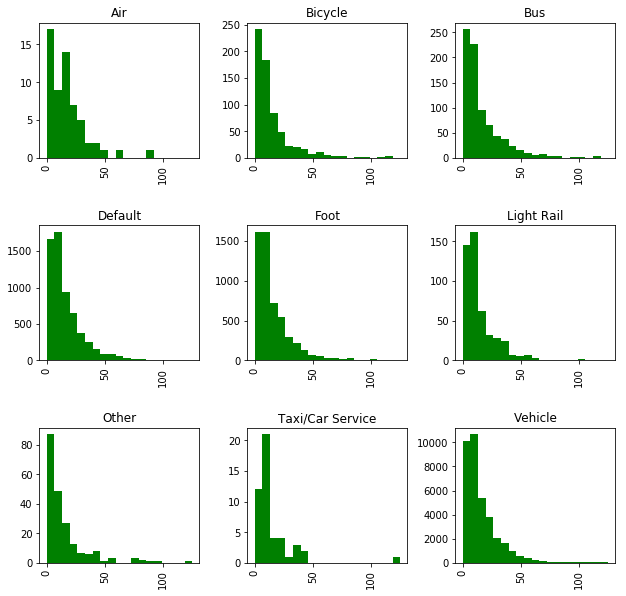

In [234]:

trip_length[['time','mode']].hist(bins=bin , by='mode', color='g', figsize=(10,10))

### MILE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003F7CC7F0>]],
      dtype=object)

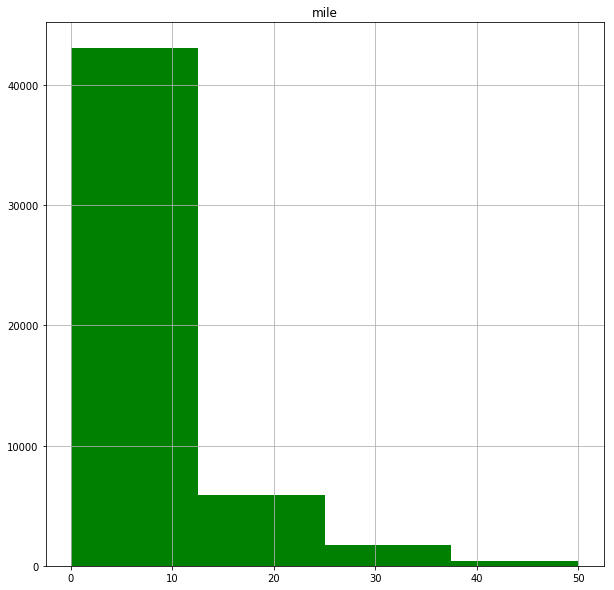

In [235]:
bin1=np.linspace(0,50,5)
trip_length[['mile']].hist(bins=bin1 , color='g', figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003F7CCC88>,
      dtype=object)

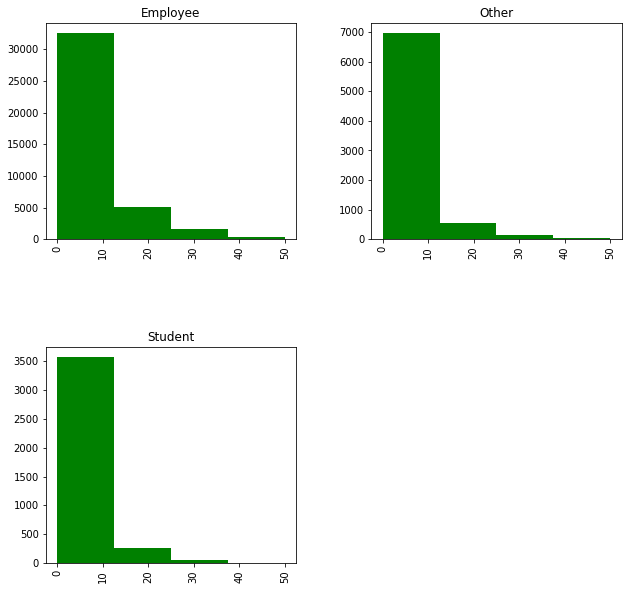

In [236]:
trip_length[['mile','Employ_status']].hist(bins=bin1 , by='Employ_status', color='g', figsize=(10,10))

## Average Trip length by time

In [265]:
trip_length_time= trip_length.groupby(['time_sort', 'time_group']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()
trip_length_time["Percentage"]=round(trip_length_time["HHPERSONID"]/sum(trip_length_time["HHPERSONID"]),4)
trip_length_time.drop(columns=['time_sort']).rename(columns={'HHPERSONID':'Count'})

,time_group,Count,Percentage
0,<=5,11136,0.2170
1,6-10,12535,0.2443
2,11-15,8021,0.1563
3,16-20,5336,0.1040
4,21-25,3783,0.0737
5,26-30,2436,0.0475
6,31-35,1987,0.0387
7,36-40,1398,0.0272
8,41-45,965,0.0188
9,46-50,655,0.0128


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'mins')

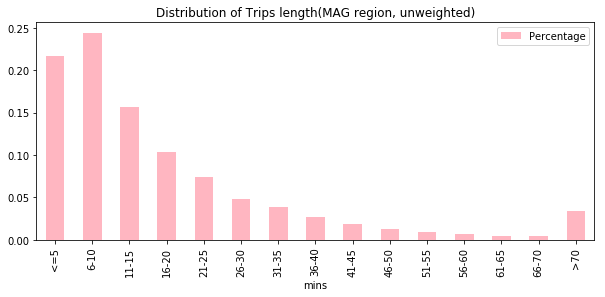

In [266]:
ax=trip_length_time.plot(x="time_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, unweighted)', figsize=(10,4))
ax.set_xlabel('mins')

In [293]:
trip_length_time_w= trip_length.groupby(['time_sort', 'time_group']) \
       .agg({'Weight':'sum'}) \
       .reset_index()
trip_length_time_w.sort_values("time_sort", inplace=True)
trip_length_time_w["Percentage"]=round(trip_length_time_w["Weight"]/sum(trip_length_time_w["Weight"]),4)
trip_length_time_w.drop(columns=['time_sort']).rename(columns={'weight':'Count'})

,time_group,Weight,Percentage
0,<=5,3.333226e+06,0.2198
1,6-10,3.616010e+06,0.2385
2,11-15,2.379004e+06,0.1569
3,16-20,1.531765e+06,0.1010
4,21-25,1.126415e+06,0.0743
5,26-30,7.308272e+05,0.0482
6,31-35,6.382958e+05,0.0421
7,36-40,4.407554e+05,0.0291
8,41-45,3.044663e+05,0.0201
9,46-50,1.900656e+05,0.0125


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'mins')

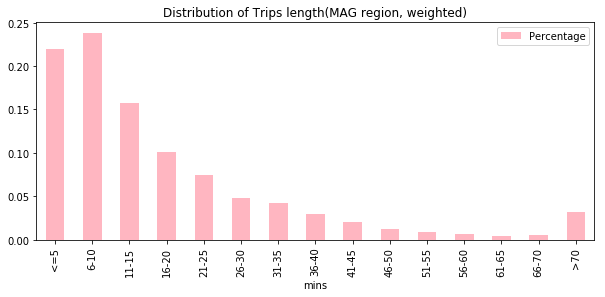

In [268]:
ax=trip_length_time_w.plot(x="time_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, weighted)', figsize=(10,4))
ax.set_xlabel('mins')

## Average Trip length by mile

Text(0.5,1,'Distribution of Trip Time for MAG region(unweighted)')

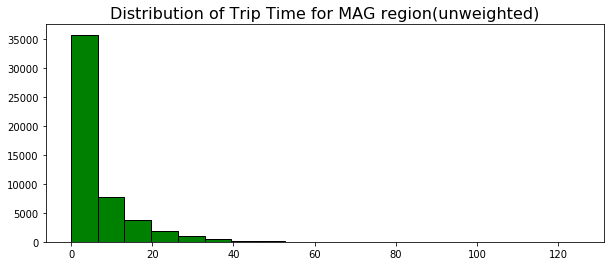

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length['mile'],bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for MAG region(unweighted)", fontsize=16)

In [238]:
trip_length_mile= trip_length.groupby(['mile_sort', 'mile_group']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()
trip_length_mile["Percentage"]=round(trip_length_mile["HHPERSONID"]/sum(trip_length_mile["HHPERSONID"]),4)
trip_length_mile.drop(columns=['mile_sort']).rename(columns={'HHPERSONID':'Count'})

,mile_group,Count,Percentage
0,<=5,32181,0.6272
1,6-10,8497,0.1656
2,11-15,4193,0.0817
3,16-20,2557,0.0498
4,21-25,1515,0.0295
5,26-30,1023,0.0199
6,31-35,516,0.0101
7,36-40,354,0.0069
8,41-50,258,0.0050
9,>50,216,0.0042


In [239]:
trip_length_mile_w= trip_length.groupby(['mile_sort', 'mile_group']) \
       .agg({'Weight':'sum'}) \
       .reset_index()
trip_length_mile_w.sort_values("mile_sort", inplace=True)
trip_length_mile_w["Percentage"]=round(trip_length_mile_w["Weight"]/sum(trip_length_mile_w["Weight"]),4)


In [240]:
trip_length_mile_w.drop(columns=['mile_sort']).rename(columns={'weight':'Count'})

,mile_group,Weight,Percentage
0,<=5,9.258328e+06,0.6105
1,6-10,2.585501e+06,0.1705
2,11-15,1.266519e+06,0.0835
3,16-20,8.235892e+05,0.0543
4,21-25,5.163227e+05,0.0340
5,26-30,3.100039e+05,0.0204
6,31-35,1.368842e+05,0.0090
7,36-40,9.603319e+04,0.0063
8,41-50,9.673246e+04,0.0064
9,>50,7.466195e+04,0.0049


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'miles')

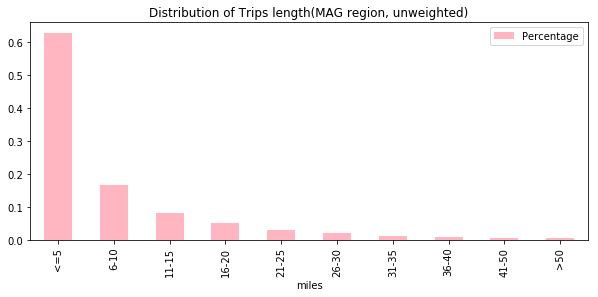

In [241]:
ax=trip_length_mile.plot(x="mile_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, unweighted)', figsize=(10,4))
ax.set_xlabel('miles')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'miles')

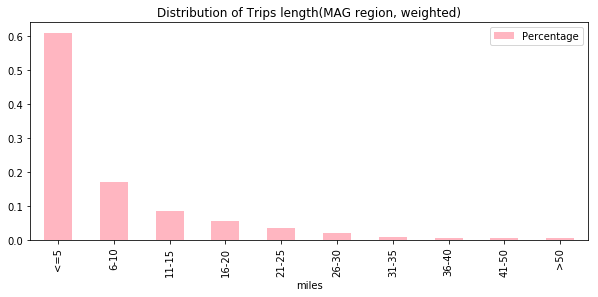

In [242]:
ax=trip_length_mile_w.plot(x="mile_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, weighted)', figsize=(10,4))
ax.set_xlabel('miles')

In [ ]:
#trip_length[['time','mode']].hist(bins=bin , by='mode', color='g', figsize=(10,10))

In [243]:
trip_length_mile_s= trip_length.groupby(['Employ_status']) \
       .agg({'HHPERSONID':'count','mile':'mean'}) \
       .reset_index()
trip_length_mile_s["Percentage"]=round(trip_length_mile_s["HHPERSONID"]/sum(trip_length_mile_s["HHPERSONID"]),4)
trip_length_mile_s.rename(columns={'HHPERSONID':'Count'})

,Employ_status,Count,mile,Percentage
0,Employee,39723,7.078981,0.7742
1,Other,7704,5.192218,0.1501
2,Student,3883,4.073863,0.0757


In [244]:
trip_length['w_mile']=trip_length['mile']*trip_length['Weight']
trip_length_mile_sw= trip_length.groupby(['Employ_status']) \
       .agg({'HHPERSONID':'count','w_mile':'sum', 'Weight':'sum'}) \
       .reset_index()
trip_length_mile_sw["mile"]=round((trip_length_mile_sw["w_mile"]/trip_length_mile_sw["Weight"]),4)

trip_length_mile_sw["Percentage"]=round(trip_length_mile_sw["Weight"]/sum(trip_length_mile_sw["Weight"]),4)
trip_length_mile_sw.rename(columns={'Weight':'Count'}).drop(columns=['HHPERSONID','w_mile'])

,Employ_status,Count,mile,Percentage
0,Employee,1.059067e+07,7.4140,0.6984
1,Other,3.322009e+06,6.0154,0.2191
2,Student,1.251895e+06,4.7875,0.0826


In [269]:
#export data
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('HTS_Glendale_trip_length2.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
#trip_length_mile.to_excel(writer, sheet_name='MAG region_unweighted')
#trip_length_mile_w.to_excel(writer, sheet_name='MAG region_weighted')
trip_length_time.to_excel(writer, sheet_name='MAG region_unweighted')
trip_length_time_w.to_excel(writer, sheet_name='MAG region_weighted')
#Close the Pandas Excel writer and output the Excel file.
writer.save()

# Average trip length for Glendale

## Start or end in Glendale

In [274]:
trip_length_g= trip_length[((trip_length.Ocity == 'Glendale')|(trip_length.Dcity == 'Glendale') )]

Unweighted trip time

In [275]:
trip_length_g['time'].mean()

21.06212181265682

In [276]:
trip_length_g['mile'].mean()

7.364613537059057

weighted trip time

In [277]:
sum(trip_length_g['time']*trip_length_g['Weight'])/sum(trip_length_g['Weight'])

19.79019014497032

In [278]:
sum(trip_length_g['mile']*trip_length_g['Weight'])/sum(trip_length_g['Weight'])

6.667642283754107

Text(0.5,0,'time(min)')

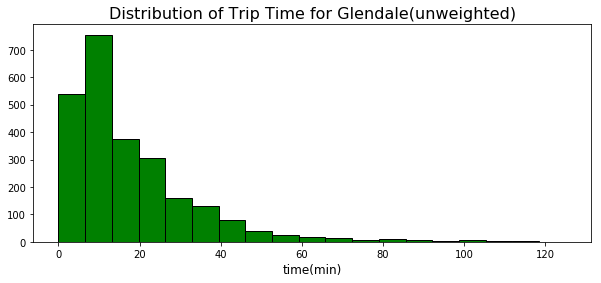

In [280]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length_g['time'],bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for Glendale(unweighted)", fontsize=16)
plt.xlabel('time(min)',fontsize=12 )


Text(0.5,0,'time(min)')

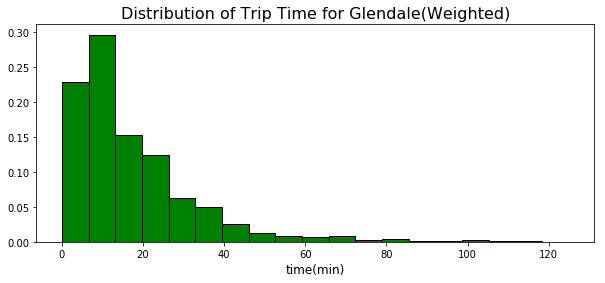

In [281]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length_g['time'], weights=trip_length_g['Weight']/sum(trip_length_g['Weight']), bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for Glendale(Weighted)", fontsize=16)
plt.xlabel('time(min)',fontsize=12 )


Text(0.5,0,'time(min)')

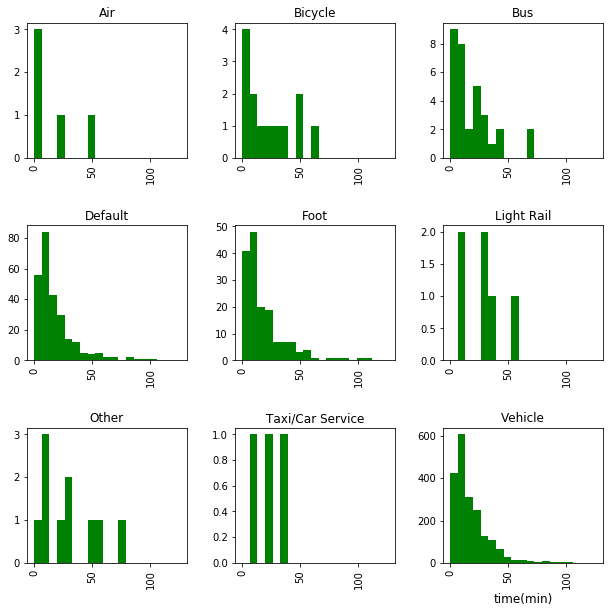

In [283]:
trip_length_g[['time','mode']].hist(bins=bin , by='mode', color='g', figsize=(10,10))
plt.xlabel('time(min)',fontsize=12 )

### Average Trip length by time

In [284]:
trip_length_g_time= trip_length_g.groupby(['time_sort', 'time_group']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()
trip_length_g_time["Percentage"]=round(trip_length_g_time["HHPERSONID"]/sum(trip_length_g_time["HHPERSONID"]),4)
trip_length_g_time.drop(columns=['time_sort']).rename(columns={'HHPERSONID':'Count'})

,time_group,Count,Percentage
0,<=5,422,0.1673
1,6-10,577,0.2287
2,11-15,432,0.1712
3,16-20,302,0.1197
4,21-25,201,0.0797
5,26-30,146,0.0579
6,31-35,114,0.0452
7,36-40,84,0.0333
8,41-45,57,0.0226
9,46-50,34,0.0135


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'mins')

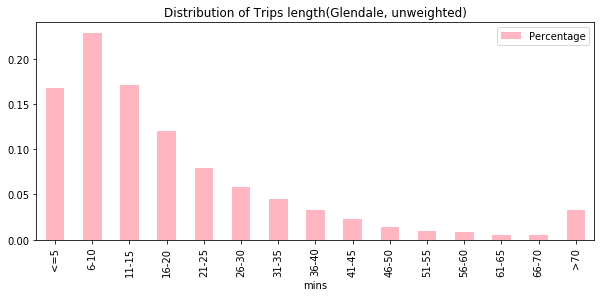

In [285]:
ax=trip_length_g_time.plot(x="time_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(Glendale, unweighted)', figsize=(10,4))
ax.set_xlabel('mins')


In [292]:
trip_length_g_time_w= trip_length_g.groupby(['time_sort', 'time_group'])\
       .agg({'Weight':'sum'})\
       .reset_index()
trip_length_g_time_w.sort_values("time_sort", inplace=True)
trip_length_g_time_w["Percentage"]=round(trip_length_g_time_w["Weight"]/sum(trip_length_g_time_w["Weight"]),4)
trip_length_g_time_w.drop(columns=['time_sort']).rename(columns={'weight':'Count'})

,time_group,Weight,Percentage
0,<=5,253489.488753,0.1779
1,6-10,337446.969469,0.2369
2,11-15,238461.143016,0.1674
3,16-20,171882.745202,0.1207
4,21-25,119218.617455,0.0837
5,26-30,82374.002208,0.0578
6,31-35,66149.100223,0.0464
7,36-40,39063.111970,0.0274
8,41-45,23667.037521,0.0166
9,46-50,19331.855557,0.0136


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'mins')

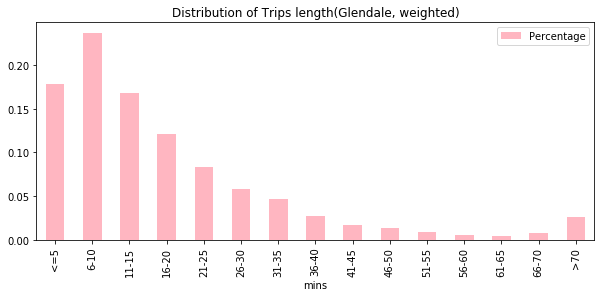

In [295]:
ax=trip_length_g_time_w.plot(x="time_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(Glendale, weighted)', figsize=(10,4))
ax.set_xlabel('mins')


### Average Trip length by mile

Text(0.5,1,'Distribution of Trip Time for Glendale region(unweighted)')

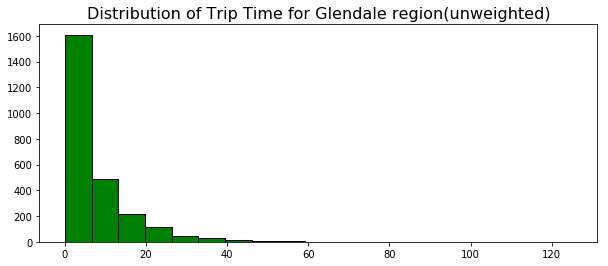

In [296]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length_g['mile'],bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for Glendale region(unweighted)", fontsize=16)

In [297]:

trip_length_g_mile= trip_length_g.groupby(['mile_sort', 'mile_group']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()
trip_length_g_mile["Percentage"]=round(trip_length_g_mile["HHPERSONID"]/sum(trip_length_g_mile["HHPERSONID"]),4)
trip_length_g_mile.drop(columns=['mile_sort']).rename(columns={'HHPERSONID':'Count'})

,mile_group,Count,Percentage
0,<=5,1362,0.5398
1,6-10,555,0.2200
2,11-15,263,0.1042
3,16-20,137,0.0543
4,21-25,92,0.0365
5,26-30,42,0.0166
6,31-35,26,0.0103
7,36-40,22,0.0087
8,41-50,16,0.0063
9,>50,8,0.0032


In [299]:

trip_length_g_mile_w= trip_length_g.groupby(['mile_sort', 'mile_group']) \
       .agg({'Weight':'sum'}) \
       .reset_index()
trip_length_g_mile_w.sort_values("mile_sort", inplace=True)
trip_length_g_mile_w["Percentage"]=round(trip_length_g_mile_w["Weight"]/sum(trip_length_g_mile_w["Weight"]),4)
trip_length_g_mile_w.drop(columns=['mile_sort']).rename(columns={'Weight':'Count'})

,mile_group,Count,Percentage
0,<=5,803062.265278,0.5637
1,6-10,323966.141231,0.2274
2,11-15,135026.547016,0.0948
3,16-20,73235.052120,0.0514
4,21-25,54056.704301,0.0379
5,26-30,14001.516386,0.0098
6,31-35,7655.136800,0.0054
7,36-40,7410.541898,0.0052
8,41-50,4741.784913,0.0033
9,>50,1356.726408,0.0010


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'miles')

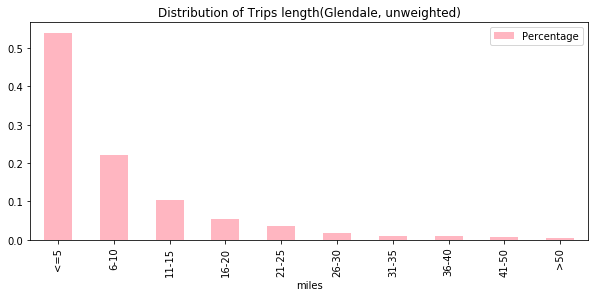

In [300]:


ax=trip_length_g_mile.plot(x="mile_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(Glendale, unweighted)', figsize=(10,4))
ax.set_xlabel('miles')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'miles')

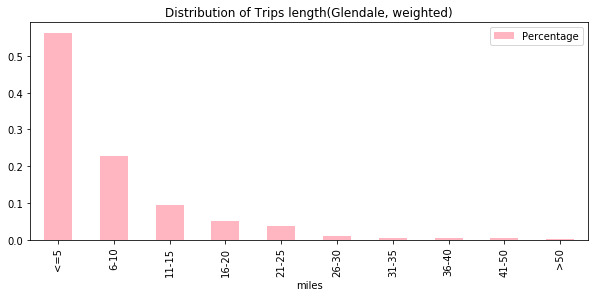

In [301]:
ax=trip_length_g_mile_w.plot(x="mile_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(Glendale, weighted)', figsize=(10,4))
ax.set_xlabel('miles')



In [303]:
#export data
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('HTS_Glendale_trip_length_g3.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
trip_length_g_mile.to_excel(writer, sheet_name='g_unweighted')
trip_length_g_mile_w.to_excel(writer, sheet_name='g_weighted')
trip_length_g_time.to_excel(writer, sheet_name='Glendale_unweighted')
trip_length_g_time_w.to_excel(writer, sheet_name='Glendale_weighted')
#Close the Pandas Excel writer and output the Excel file.
writer.save()

## From Glendale to outside

In [ ]:
trip_from= trip_length[((trip_length.Ocity == 'Glendale')&(trip_length.Dcity != 'Glendale') )]

In [ ]:
trip_from['time'].hist(bins=100 ,color='g', figsize=(5,5))

## From  outside to  Glendale

In [ ]:
trip_to= trip_length[((trip_length.Ocity != 'Glendale')&(trip_length.Dcity == 'Glendale') )]

In [ ]:
trip_to['time'].hist(bins=100 ,color='g', figsize=(5,5))

## From  Glendale to  Glendale

In [ ]:
trip_g_g= trip_length[((trip_length.Ocity == 'Glendale')&(trip_length.Dcity == 'Glendale') )]

In [ ]:
trip_g_g['time'].hist(bins=100 ,color='g', figsize=(5,5))

# Trip length from model

In [3]:
os.chdir('I:/10_STAFF/YP/HTS/Glendale analysis')

In [73]:
df_model=pd.read_csv('2018_model_run_trip_w_skim.csv')

In [74]:
df_model1=df_model.merge(TAZ,left_on='OTAZ',right_on='TAZ',how='left').rename(columns={'MPA_NAME':'Ocity'})

In [75]:
df_model2=df_model1.merge(TAZ,left_on='DTAZ',right_on='TAZ',how='left').rename(columns={'MPA_NAME':'Dcity'}).drop(columns=['TAZ_x','TAZ_y'])

In [76]:
df_model2.tail()

,OTAZ,DTAZ,OP_Trip,PK_Trip,OP_Dist,OP_Time,PK_Dist,PK_Time,Ocity,Dcity
9616196,3188,3184,3.651126e-07,8.981439e-07,59.83,68.50,59.88,88.39,Phoenix,Coolidge
9616197,3188,3185,5.408204e-02,4.401114e-02,10.68,21.58,10.68,25.66,Phoenix,Tempe
9616198,3188,3186,1.362441e-01,1.122169e-01,10.85,24.17,10.85,28.42,Phoenix,Tempe
9616199,3188,3187,3.266687e+00,2.551079e+00,0.91,4.56,0.91,5.46,Phoenix,Phoenix
9616200,3188,3188,1.509390e+00,1.189787e+00,0.26,2.92,0.26,2.91,Phoenix,Phoenix


In [77]:
op_model=df_model2[['OTAZ','DTAZ','OP_Trip','OP_Dist','OP_Time','Ocity' ,'Dcity']]
r_columns=['OTAZ','DTAZ','Weight','mile', 'time','Ocity' ,'Dcity']
op_model.columns=r_columns

In [78]:
op_model

,OTAZ,DTAZ,Weight,mile,time,Ocity,Dcity
0,1,1,0.000000e+00,15.03,17.08,NaN,NaN
1,1,2,0.000000e+00,129.80,118.35,NaN,NaN
2,1,3,0.000000e+00,155.23,171.76,NaN,NaN
3,1,4,0.000000e+00,185.39,227.87,NaN,NaN
4,1,5,0.000000e+00,171.19,198.91,NaN,NaN
5,1,6,0.000000e+00,192.01,239.85,NaN,NaN
6,1,7,0.000000e+00,180.42,198.74,NaN,NaN
7,1,8,0.000000e+00,143.17,143.72,NaN,NaN
8,1,9,0.000000e+00,146.15,168.05,NaN,NaN
9,1,10,0.000000e+00,151.81,178.29,NaN,NaN


In [79]:
pk_model=df_model2[['OTAZ','DTAZ','PK_Trip','PK_Dist','PK_Time','Ocity' ,'Dcity']]
r_columns=['OTAZ','DTAZ','Weight','mile', 'time','Ocity' ,'Dcity']
pk_model.columns=r_columns

In [102]:
trip_length_m=pk_model

In [103]:
trip_length_m.dtypes

OTAZ        int64
DTAZ        int64
Weight    float64
mile      float64
time      float64
Ocity      object
Dcity      object
dtype: object

In [104]:
trip_length_m['time_group'] = '>70'
trip_length_m.loc[trip_length_m['time']<=70, 'time_group'] = '66-70'
trip_length_m.loc[trip_length_m['time']<=65, 'time_group'] = '61-65'
trip_length_m.loc[trip_length_m['time']<=60, 'time_group'] = '56-60'
trip_length_m.loc[trip_length_m['time']<=55, 'time_group'] = '51-55'
trip_length_m.loc[trip_length_m['time']<=50, 'time_group'] = '46-50'
trip_length_m.loc[trip_length_m['time']<=45, 'time_group'] = '41-45'
trip_length_m.loc[trip_length_m['time']<=40, 'time_group'] = '36-40'
trip_length_m.loc[trip_length_m['time']<=35, 'time_group'] = '31-35'
trip_length_m.loc[trip_length_m['time']<=30, 'time_group'] = '26-30'
trip_length_m.loc[trip_length_m['time']<=25, 'time_group'] = '21-25'
trip_length_m.loc[trip_length_m['time']<=20, 'time_group'] = '16-20'
trip_length_m.loc[trip_length_m['time']<=15, 'time_group'] = '11-15'
trip_length_m.loc[trip_length_m['time']<=10, 'time_group'] = '6-10'
trip_length_m.loc[trip_length_m['time']<=5, 'time_group'] = '<=5'

trip_length_m['time_sort'] = 15
trip_length_m.loc[trip_length_m['time']<=70, 'time_sort'] = 14
trip_length_m.loc[trip_length_m['time']<=65, 'time_sort'] = 13
trip_length_m.loc[trip_length_m['time']<=60, 'time_sort'] = 12
trip_length_m.loc[trip_length_m['time']<=55, 'time_sort'] = 11
trip_length_m.loc[trip_length_m['time']<=50, 'time_sort'] = 10
trip_length_m.loc[trip_length_m['time']<=45, 'time_sort'] = 9
trip_length_m.loc[trip_length_m['time']<=40, 'time_sort'] = 8
trip_length_m.loc[trip_length_m['time']<=35, 'time_sort'] = 7
trip_length_m.loc[trip_length_m['time']<=30, 'time_sort'] = 6
trip_length_m.loc[trip_length_m['time']<=25, 'time_sort'] = 5
trip_length_m.loc[trip_length_m['time']<=20, 'time_sort'] = 4
trip_length_m.loc[trip_length_m['time']<=15, 'time_sort'] = 3
trip_length_m.loc[trip_length_m['time']<=10, 'time_sort'] = 2
trip_length_m.loc[trip_length_m['time']<=5, 'time_sort'] = 1



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [105]:
trip_length_m['mile_group'] = '>50'
trip_length_m.loc[trip_length_m['mile']<=50, 'mile_group'] = '41-50'
trip_length_m.loc[trip_length_m['mile']<=40, 'mile_group'] = '36-40'
trip_length_m.loc[trip_length_m['mile']<=35, 'mile_group'] = '31-35'
trip_length_m.loc[trip_length_m['mile']<=30, 'mile_group'] = '26-30'
trip_length_m.loc[trip_length_m['mile']<=25, 'mile_group'] = '21-25'
trip_length_m.loc[trip_length_m['mile']<=20, 'mile_group'] = '16-20'
trip_length_m.loc[trip_length_m['mile']<=15, 'mile_group'] = '11-15'
trip_length_m.loc[trip_length_m['mile']<=10, 'mile_group'] = '6-10'
trip_length_m.loc[trip_length_m['mile']<=5, 'mile_group'] = '<=5'

trip_length_m['mile_sort'] = 10
trip_length_m.loc[trip_length_m['mile']<=50, 'mile_sort'] = 9
trip_length_m.loc[trip_length_m['mile']<=40, 'mile_sort'] = 8
trip_length_m.loc[trip_length_m['mile']<=35, 'mile_sort'] = 7
trip_length_m.loc[trip_length_m['mile']<=30, 'mile_sort'] = 6
trip_length_m.loc[trip_length_m['mile']<=25, 'mile_sort'] = 5
trip_length_m.loc[trip_length_m['mile']<=20, 'mile_sort'] = 4
trip_length_m.loc[trip_length_m['mile']<=15, 'mile_sort'] = 3
trip_length_m.loc[trip_length_m['mile']<=10, 'mile_sort'] = 2
trip_length_m.loc[trip_length_m['mile']<=5, 'mile_sort'] = 1


In [106]:
#Unweighted trip time
trip_length_m['time'].mean()

68.64703480511717

In [107]:
trip_length_m['mile'].mean()

48.61973407482193

In [108]:
#Weighted trip time
sum(trip_length_m['time']*trip_length_m['Weight'])/sum(trip_length_m['Weight'])

13.973768370760272

In [109]:
sum(trip_length_m['mile']*trip_length_m['Weight'])/sum(trip_length_m['Weight'])

6.359262519501575

Text(0.5,0,'time(min)')

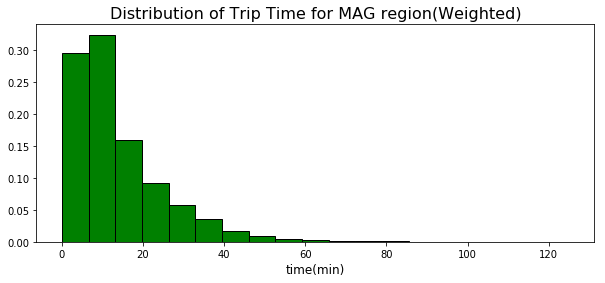

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length_m['time'], weights=trip_length_m['Weight']/sum(trip_length_m['Weight']), bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for MAG region(Weighted)", fontsize=16)
plt.xlabel('time(min)',fontsize=12 )

Text(0.5,0,'time(min)')

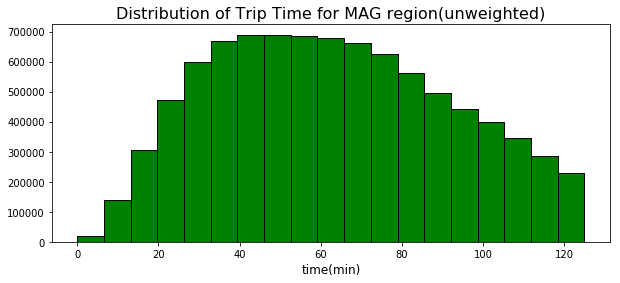

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(trip_length_m['time'],bins=bin, color='green',edgecolor='black')
plt.title("Distribution of Trip Time for MAG region(unweighted)", fontsize=16)
plt.xlabel('time(min)',fontsize=12 )

In [112]:
#trip_length_m[['time','mode']].hist(bins=bin , by='mode', color='g', figsize=(10,10))

In [113]:
trip_length_m_time= trip_length_m.groupby(['time_sort', 'time_group']) \
       .agg({'OTAZ':'count'}) \
       .reset_index()
trip_length_m_time["Percentage"]=round(trip_length_m_time["OTAZ"]/sum(trip_length_m_time["OTAZ"]),4)
trip_length_m_time.drop(columns=['time_sort']).rename(columns={'OTAZ':'Count'})


,time_group,Count,Percentage
0,<=5,8490,0.0009
1,6-10,66643,0.0069
2,11-15,153246,0.0159
3,16-20,252907,0.0263
4,21-25,350310,0.0364
5,26-30,429323,0.0446
6,31-35,485380,0.0505
7,36-40,511906,0.0532
8,41-45,522122,0.0543
9,46-50,524696,0.0546


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'mins')

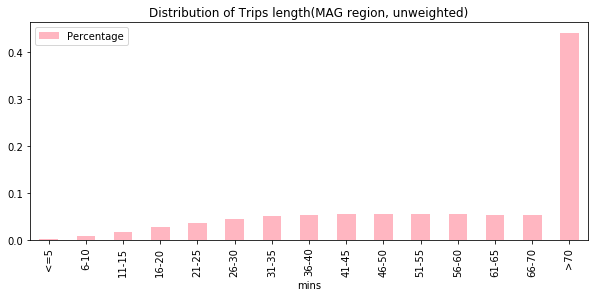

In [114]:
ax=trip_length_m_time.plot(x="time_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, unweighted)', figsize=(10,4))
ax.set_xlabel('mins')

In [115]:
trip_length_m_time_w= trip_length_m.groupby(['time_sort', 'time_group']) \
       .agg({'Weight':'sum'}) \
       .reset_index()
trip_length_m_time_w.sort_values("time_sort", inplace=True)
trip_length_m_time_w["Percentage"]=round(trip_length_m_time_w["Weight"]/sum(trip_length_m_time_w["Weight"]),4)
trip_length_m_time_w.drop(columns=['time_sort']).rename(columns={'weight':'Count'})

,time_group,Weight,Percentage
0,<=5,1.777734e+06,0.1908
1,6-10,2.799494e+06,0.3004
2,11-15,1.698690e+06,0.1823
3,16-20,1.012360e+06,0.1086
4,21-25,6.777202e+05,0.0727
5,26-30,4.679715e+05,0.0502
6,31-35,3.299441e+05,0.0354
7,36-40,2.215707e+05,0.0238
8,41-45,1.260908e+05,0.0135
9,46-50,7.748786e+04,0.0083


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'mins')

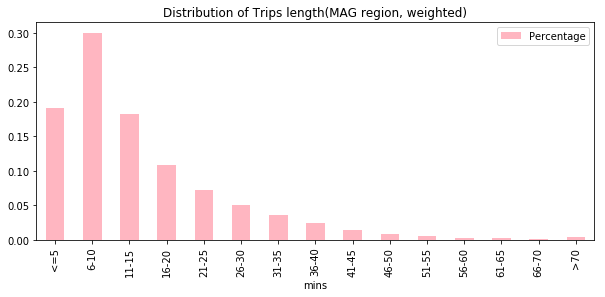

In [116]:

ax=trip_length_m_time_w.plot(x="time_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, weighted)', figsize=(10,4))
ax.set_xlabel('mins')


In [117]:
trip_length_m_mile= trip_length_m.groupby(['mile_sort', 'mile_group']) \
       .agg({'OTAZ':'count'}) \
       .reset_index()
trip_length_m_mile["Percentage"]=round(trip_length_m_mile["OTAZ"]/sum(trip_length_m_mile["OTAZ"]),4)
trip_length_m_mile.drop(columns=['mile_sort']).rename(columns={'OTAZ':'Count'})

,mile_group,Count,Percentage
0,<=5,156275,0.0163
1,6-10,384068,0.0399
2,11-15,527923,0.0549
3,16-20,611177,0.0636
4,21-25,650357,0.0676
5,26-30,652348,0.0678
6,31-35,642126,0.0668
7,36-40,622311,0.0647
8,41-50,1189831,0.1237
9,>50,4179785,0.4347


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'miles')

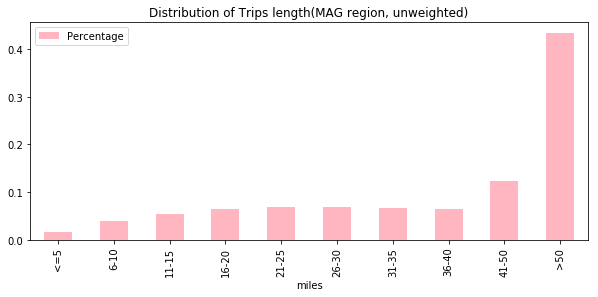

In [118]:
ax=trip_length_m_mile.plot(x="mile_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, unweighted)', figsize=(10,4))
ax.set_xlabel('miles')

In [119]:
trip_length_m_mile_w= trip_length_m.groupby(['mile_sort', 'mile_group']) \
       .agg({'Weight':'sum'}) \
       .reset_index()
trip_length_m_mile_w.sort_values("mile_sort", inplace=True)
trip_length_m_mile_w["Percentage"]=round(trip_length_m_mile_w["Weight"]/sum(trip_length_m_mile_w["Weight"]),4)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'miles')

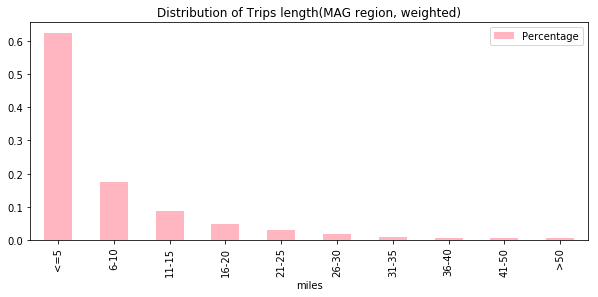

In [120]:
ax=trip_length_m_mile_w.plot(x="mile_group", y=['Percentage'], kind="bar",color=['lightpink'], title='Distribution of Trips length(MAG region, weighted)', figsize=(10,4))
ax.set_xlabel('miles')

In [121]:
#export data
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('HTS_Glendale_trip_length_g4.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
trip_length_m_mile.to_excel(writer, sheet_name='m_unweighted')
trip_length_m_mile_w.to_excel(writer, sheet_name='m_weighted')
trip_length_m_time.to_excel(writer, sheet_name='t_unweighted')
trip_length_m_time_w.to_excel(writer, sheet_name='t_weighted')
#Close the Pandas Excel writer and output the Excel file.
writer.save()